In [2]:
import time as time
import math

import numpy as np
import matplotlib.pyplot as plt

from numba import njit
from numba.typed import Dict
from numba.core import types 

In [3]:
def measure_time(func):
    def decorated(param):
        x = time.time()
        res = func(param)
        dt = time.time()-x
        print(dt)
        return dt, res
    #
    return decorated
# 

In [4]:
@njit 
def delta(a, b): 
    if a == b:
        return 1 
    else : 
        return 0 
    #
# 


In [5]:
@njit
def element_fun(i, j, Bmax, Amax, k1, k2):
    
    A = i // (Bmax + 1)
    B = i % (Bmax + 1)
    
    Ap = j // (Bmax + 1)
    Bp = j % (Bmax + 1)
    
    Mij =  k1*delta(A+1, Ap)*delta(B-1, Bp)
    Mij += k2*delta(A-1, Ap)*delta(B+1, Bp)
    Mij += -(k1+k2)*delta(Ap,A)*delta(Bp,B)
    
    return Mij 

@njit
def fill_matrix(mat_len, Bmax, Amax, mat, k1, k2):
    for i in range(mat_len): 
        for j in range(mat_len):
            mat[i][j] = element_fun(i, j, Bmax, Amax, k1, k2)
        #
    #
    
    return mat 
#

@njit 
def FSP_cutoff(mat_len, mat):
    for i in range(mat_len):
        mat[i][i] = mat[i][i] - sum(mat[:,i])
    #
    return mat
#

0j


/home/jhchae/miniconda3/envs/jh/lib/python3.7/site-packages/ipykernel_launcher.py:27: ComplexWarning: Casting complex values to real discards the imaginary part


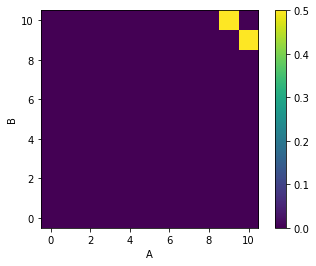

(3.367702055640532e-17+0j)


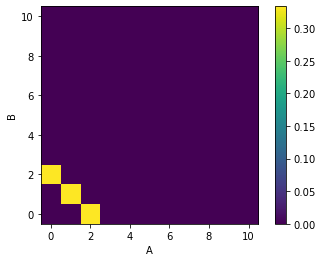

(2.3873362687579936e-17+0j)


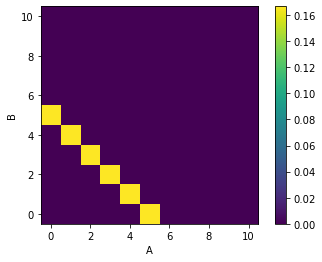

0j


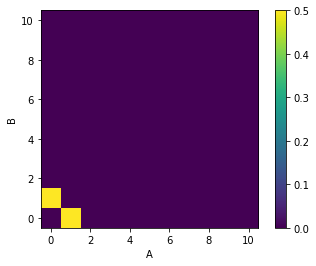

(-1.20324475759516e-15+0j)


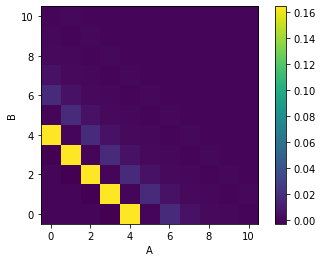

(4.3577549980756825e-16+0j)


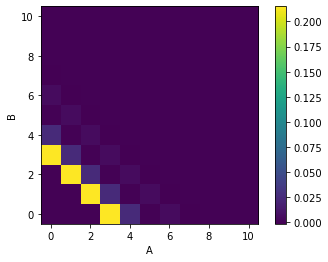

(-1.086181892797139e-16+0j)


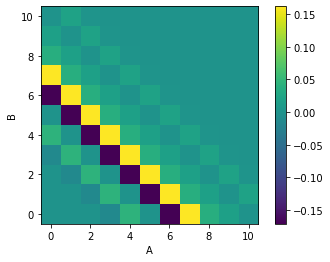

(3.1309354947218596e-16+3.1115994119118576e-16j)


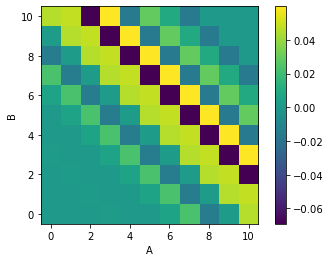

(3.1309354947218596e-16-3.1115994119118576e-16j)


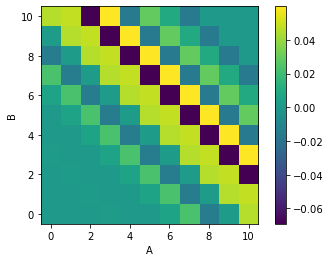

(7.72005378524926e-16+0j)


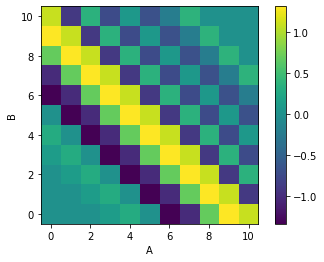

(3.35387219505735e-16+0j)


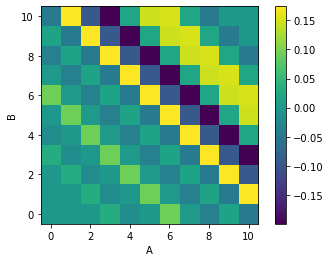

(-2.2524877618229373e-17+0j)


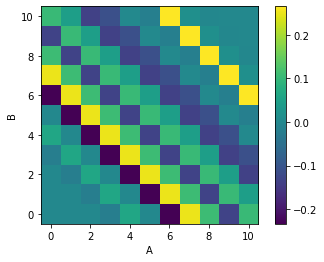

(5.948745864780201e-16+0j)


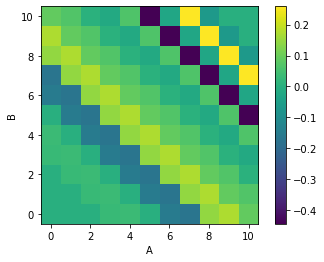

(-2.586725479926977e-16+5.876516586485375e-17j)


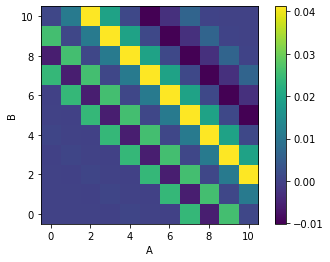

(-2.586725479926977e-16-5.876516586485375e-17j)


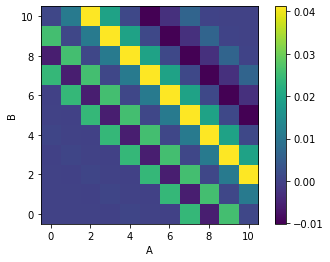

(2.839875576114729e-16+3.231685895186259e-17j)


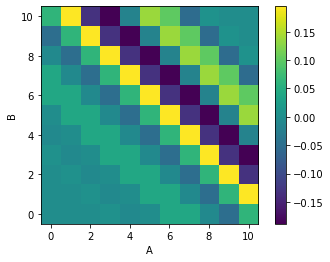

(2.839875576114729e-16-3.231685895186259e-17j)


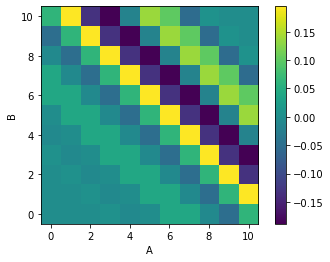

(2.852960259357075e-17+0j)


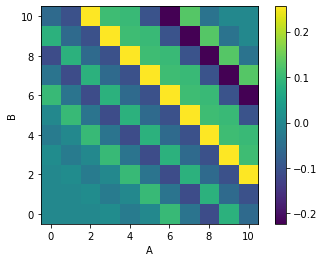

(-3.572609107126242e-17+0j)


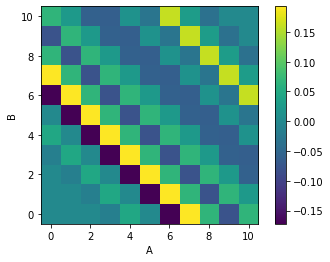

0j


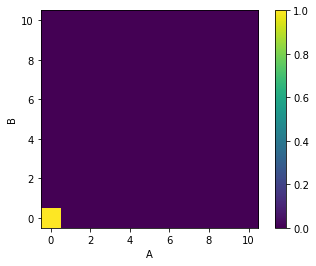

0j


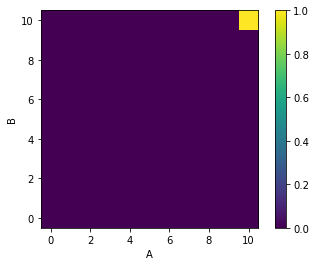

In [19]:
para_list = [1, 1]

Amax = 10
Bmax = 10
mat_len = (Amax+1) * (Bmax + 1)
M = np.zeros((mat_len, mat_len), dtype=float)

M = fill_matrix(mat_len, Bmax, Amax, M, *para_list)
M = FSP_cutoff(mat_len, M)
eig_val, eig_vec = np.linalg.eig(M)

prob_eq = np.zeros(( Amax+1, Bmax+1))
max_eig = max(eig_val)
max_idx_list = np.where(eig_val > -1e-10)[0]

for max_idx in max_idx_list:
    max_vec = eig_vec[:,max_idx]
    print(eig_val[max_idx])


    vec_norm = sum((max_vec))
    for i in range(len(max_vec)): 
        A = i // (Bmax + 1)
        B = i % (Bmax + 1)
        
        
        prob_eq[A, B] = (max_vec[i])/vec_norm
        
    plt.xlabel("A")
    plt.ylabel("B")
    plt.imshow(prob_eq, aspect=1, origin="lower")
    plt.colorbar()
    plt.show()


In [16]:
sorted(eig_val)

[-3.6180339887498874,
 -3.4142135623731003,
 -3.4142135623731,
 -3.000000000000001,
 -2.999999999999999,
 -2.618033988749894,
 -2.0,
 -2.0,
 -1.9999999999999998,
 -1.9999999999999973,
 -1.3819660112501029,
 -1.0000000000000004,
 -0.9999999999999998,
 -0.5857864376269052,
 -0.5857864376269045,
 -0.38196601125010526,
 -4.2641284943870874e-16,
 -1.5292835262449123e-16,
 0.0,
 0.0,
 0.0,
 0.0,
 4.570970808454303e-19,
 3.367702055640532e-17,
 2.0363451279554947e-16]

In [8]:
eig_val

array([ 0.00000000e+00, -2.00000000e+00, -3.00000000e+00, -1.00000000e+00,
        3.36770206e-17,  0.00000000e+00, -2.00000000e+00, -3.41421356e+00,
       -2.00000000e+00,  2.03634513e-16, -5.85786438e-01, -3.61803399e+00,
       -3.41421356e+00, -2.61803399e+00, -2.00000000e+00, -1.38196601e+00,
       -3.81966011e-01, -5.85786438e-01, -3.00000000e+00, -1.52928353e-16,
       -1.00000000e+00,  4.57097081e-19, -4.26412849e-16,  0.00000000e+00,
        0.00000000e+00])

In [9]:
eig_val

array([ 0.00000000e+00, -2.00000000e+00, -3.00000000e+00, -1.00000000e+00,
        3.36770206e-17,  0.00000000e+00, -2.00000000e+00, -3.41421356e+00,
       -2.00000000e+00,  2.03634513e-16, -5.85786438e-01, -3.61803399e+00,
       -3.41421356e+00, -2.61803399e+00, -2.00000000e+00, -1.38196601e+00,
       -3.81966011e-01, -5.85786438e-01, -3.00000000e+00, -1.52928353e-16,
       -1.00000000e+00,  4.57097081e-19, -4.26412849e-16,  0.00000000e+00,
        0.00000000e+00])